In [1]:
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef
from statistics import stdev, variance, mean
from sklearn.base import clone

In [2]:
mat_client=np.load("../data/PTT5XLU50_human_client.npy", allow_pickle=True)
mat_nonLLPS=np.load("../data/PTT5XLU50_human_nonllps.npy", allow_pickle=True)
list_client=list(mat_client.item().values())
list_nonLLPS=list(mat_nonLLPS.item().values())

In [3]:
class Benchmark_model():
    def __init__(self, model):
        self.model=model
        self.models=[]

    def under_sampling(self, x:np.array, y:np.array):
        x_ture=x[y==True]
        x_false=x[y==False]
        y_ture=y[y==True]
        y_false=y[y==False]
        positive_n=len(y_ture)
        negative_n=len(y_false)
        random_index=np.random.randint(0,negative_n,positive_n)  
        x_false_u=x_false[random_index]
        y_false_u=y_false[random_index]
        return np.concatenate([x_ture, x_false_u]), np.concatenate([y_ture, y_false_u])
    
    def fit_model(self, x:np.array, y:np.array):
        for i in range(10):
            x_sampled, y_sampled=self.under_sampling(x, y)
            model=clone(self.model)
            model.fit(x_sampled, y_sampled)
            self.models.append(model)
            print("{}/10 done".format(i+1))
    
    def predict(self, x:np.array, y:np.array):
        self.tprs=[]
        self.rocaucs=[]
        self.praucs=[]
        self.mccs=[]
        mean_fpr = np.linspace(0, 1, 1000)
        for i in range(10):
            x_sampled, y_sampled=self.under_sampling(x, y)
            
            y_pred_proba=self.models[i].predict_proba(x_sampled)[:,1]
            y_pred=self.models[i].predict(x_sampled)
            fpr, tpr, thresholds = roc_curve(y_sampled, y_pred_proba)
            roc_auc=auc(fpr,tpr)
            precision, recall, thresholds = precision_recall_curve(y_sampled, y_pred_proba)
            pr_auc = auc(recall, precision)
            mcc=matthews_corrcoef(y_sampled, y_pred)
            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0
            self.tprs.append(interp_tpr)
            self.rocaucs.append(roc_auc)
            self.praucs.append(pr_auc)
            self.mccs.append(mcc)
            print("{}/10 done".format(i+1))
        print("ROC AUC {:.3f}±{:.3f}".format(mean(self.rocaucs), stdev(self.rocaucs)))
        print("PR AUC {:.3f}±{:.3f}".format(mean(self.praucs), stdev(self.praucs)))
        print("MCC {:.3f}±{:.3f}".format(mean(self.mccs), stdev(self.mccs)))

In [4]:
def display_auc(benchmark, title=""):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    fpr = np.linspace(0, 1, 1000)
    for i, tpr in enumerate(benchmark.tprs):
        ax.plot(
        fpr,
        tpr,
        color="gray",
        lw=1,
        alpha=0.3
        )
    mean_tpr = np.mean(benchmark.tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc=mean(benchmark.rocaucs)
    std_auc=stdev(benchmark.rocaucs)
    ax.plot(
        fpr,
        mean_tpr,
        color="b",
        label=r"PhaseTransPred (AUC = %0.3f $\pm$ %0.3f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )
    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.3)
    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title=title
    )
    ax.set_xlabel("False positive rate", fontsize=13)
    ax.set_ylabel("True positive rate", fontsize=13)
    ax.legend(loc="lower right")
    plt.show()

In [5]:
x=np.array(list_client+list_nonLLPS)
y=np.array([True]*len(list_client) + [False]*len(list_nonLLPS))
model=make_pipeline(StandardScaler(), SVC(class_weight="balanced", probability=True))

In [6]:
benchmark_svm=Benchmark_model(model)
benchmark_svm.fit_model(x,y)

1/10 done
2/10 done
3/10 done
4/10 done
5/10 done
6/10 done
7/10 done
8/10 done
9/10 done
10/10 done


In [7]:
mat_client=np.load("../data/PTT5XLU50_yeast_client_nohomolog.npy", allow_pickle=True)
mat_nonLLPS=np.load("../data/PTT5XLU50_yeast_nonllps_nohomolog.npy", allow_pickle=True)
list_client_yeast=list(mat_client.item().values())
list_nonLLPS_yeast=list(mat_nonLLPS.item().values())

In [8]:
mat_client=np.load("../data/PTT5XLU50_arabi_client_nohomolog.npy", allow_pickle=True)
mat_nonLLPS=np.load("../data/PTT5XLU50_arabi_nonllps_nohomolog.npy", allow_pickle=True)
list_client_arabi=list(mat_client.item().values())
list_nonLLPS_arabi=list(mat_nonLLPS.item().values())

In [9]:
mat_client=np.load("../data/PTT5XLU50_mouse_client_nohomolog.npy", allow_pickle=True)
mat_nonLLPS=np.load("../data/PTT5XLU50_mouse_nonllps_nohomolog.npy", allow_pickle=True)
list_client_mouse=list(mat_client.item().values())
list_nonLLPS_mouse=list(mat_nonLLPS.item().values())

1/10 done
2/10 done
3/10 done
4/10 done
5/10 done
6/10 done
7/10 done
8/10 done
9/10 done
10/10 done
ROC AUC 0.791±0.031
PR AUC 0.756±0.040
MCC 0.283±0.049


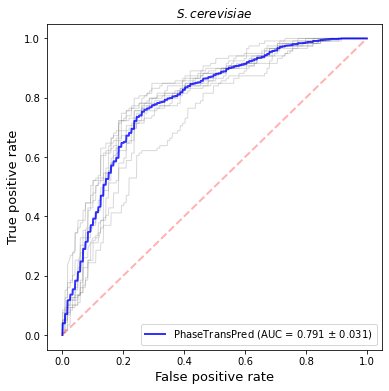

In [10]:
x=np.array(list_client_yeast+list_nonLLPS_yeast)
y=np.array([True]*len(list_client_yeast) + [False]*len(list_nonLLPS_yeast))
benchmark_svm.predict(x, y)
display_auc(benchmark_svm, "$\it{S. cerevisiae}$")

1/10 done
2/10 done
3/10 done
4/10 done
5/10 done
6/10 done
7/10 done
8/10 done
9/10 done
10/10 done
ROC AUC 0.817±0.018
PR AUC 0.827±0.021
MCC 0.512±0.043


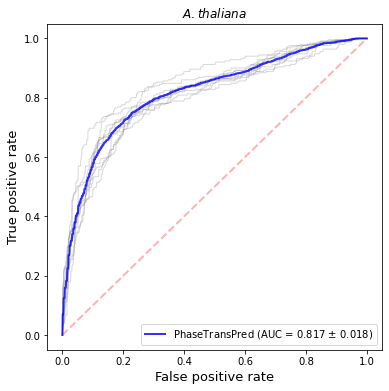

In [11]:
x=np.array(list_client_arabi+list_nonLLPS_arabi)
y=np.array([True]*len(list_client_arabi) + [False]*len(list_nonLLPS_arabi))
benchmark_svm.predict(x, y)
display_auc(benchmark_svm, "$\it{A. thaliana}$")

1/10 done
2/10 done
3/10 done
4/10 done
5/10 done
6/10 done
7/10 done
8/10 done
9/10 done
10/10 done
ROC AUC 0.850±0.097
PR AUC 0.861±0.153
MCC 0.758±0.122


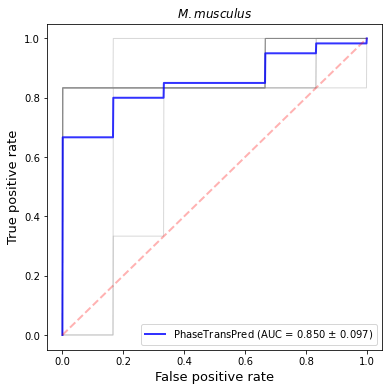

In [12]:
x=np.array(list_client_mouse+list_nonLLPS_mouse)
y=np.array([True]*len(list_client_mouse) + [False]*len(list_nonLLPS_mouse))
benchmark_svm.predict(x, y)
display_auc(benchmark_svm, "$\it{M. musculus}$")